# Price Range Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://drive.usercontent.google.com/download?id=1eS-q31uXdtdpSOg15g7SZ65rZjBM7gBO&export=download&authuser=0&confirm=t&uuid=9b80a293-3ecc-4384-9104-01f94bad3aed&at=AIrpjvPqQ2wonqOuzuiI__NUKLbD:1738586972677.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df['Price range']=pd.to_numeric(df['Price range'],errors='coerce')

In [5]:
most_common_price_range=df['Price range'].mode()[0]
print(f"Most common price range:{most_common_price_range}")

Most common price range:1


In [6]:
avg_rating_by_price_range=df.groupby('Price range')['Aggregate rating'].mean().round(3)
print("\nAverage rating for each price range:")
print(avg_rating_by_price_range)


Average rating for each price range:
Price range
1    2.000
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


In [7]:
highest_avg_rating_price=avg_rating_by_price_range.idxmax()


Color representing the highest average rating:Yellow


<BarContainer object of 4 artists>

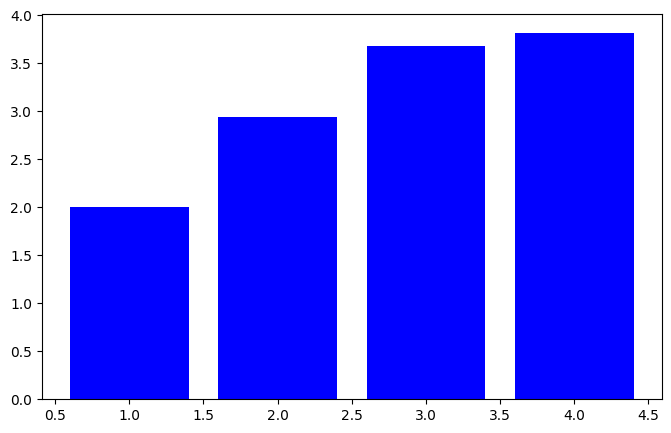

In [16]:
highest_avg_rating_color=df.loc[df['Price range']==highest_avg_rating_price,'Rating color'].mode()[0]
print(f"\nColor representing the highest average rating:{highest_avg_rating_color}")
plt.figure(figsize=(8,5))
plt.bar(avg_rating_by_price_range.index,avg_rating_by_price_range,color='blue')

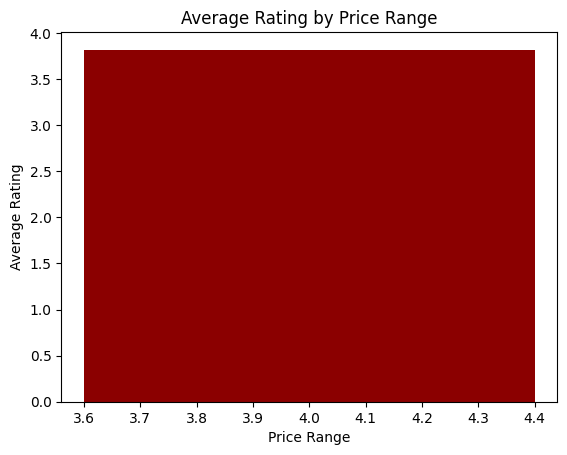

In [12]:
plt.bar(highest_avg_rating_price,avg_rating_by_price_range[highest_avg_rating_price],color='darkred')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()